<a href="https://colab.research.google.com/github/Nagmashaik123/INFO5505MachineLearning/blob/main/Lab8_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

df= pd.read_csv("pokemon.csv")
df

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new,notes
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500,2,Tackle,Normal,...,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
1,Pidgey2,Pidgey,366,54,1.67,0.29,2500,2,Quick Attack,Normal,...,1.05,2500,2,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000,3,Quick Attack,Normal,...,1.11,3000,3,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000,3,Tackle,Normal,...,1.12,3000,3,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900,2,Quick Attack,Normal,...,0.98,1900,2,Wing Attack,Flying,9,Twister,Dragon,25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Eevee3,Eevee,500,64,5.11,0.26,2200,2,Tackle,Normal,...,0.77,2200,2,Ember,Fire,10,Fire Blast,Fire,100,"Jolteon, attack details added on date later th..."
71,Eevee7,Eevee,606,74,10.42,0.38,2500,2,Tackle,Normal,...,1.26,2500,2,Water Gun,Water,6,Aqua Tail,Water,45,"Vaporeon, attack details added on date later t..."
72,Eevee8,Eevee,548,66,6.87,0.32,2500,2,Tackle,Normal,...,0.95,2500,2,Ember,Fire,10,Heat Wave,Fire,80,"Flareon, attack details added on date later th..."
73,Eevee9,Eevee,528,66,7.43,0.31,2200,2,Quick Attack,Normal,...,0.82,2200,2,Thunder Shock,Electric,5,Thunderbolt,Electric,55,"Jolteon, attack details added on date later th..."


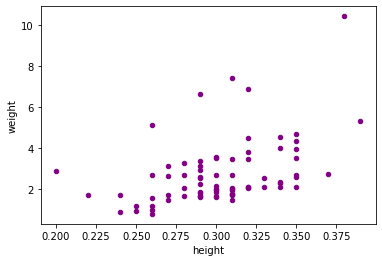

In [15]:
import matplotlib.pyplot as plt
import numpy as np 
% matplotlib inline

df.plot.scatter(x='height', y='weight', c='purple')

In [7]:
pearsonCoefficient = df["height"].corr(df["weight"])
print(pearsonCoefficient)

0.4421055507813025


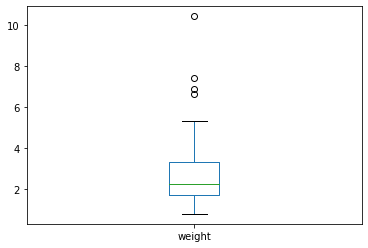

In [16]:

#df.boxplot(by ='None', column =['weight'], grid = False)
boxplot = df.boxplot(column =['weight'],grid = False)

In [25]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [26]:
outliers = find_outliers_IQR(df["weight"])
print("number of outliers: ", str(len(outliers)))
print("max outlier value: ", str(outliers.max()))
print("min outlier value: ", str(outliers.min()))

number of outliers:  4
max outlier value:  10.42
min outlier value:  6.63


In [29]:
!pip install sklearn

In [30]:
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy

In [80]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['height'], df["weight"]>=6)


In [81]:
r_value**2

0.024109098913001295

In [ ]:
!pip install sklearn

In [67]:
from sklearn.model_selection import train_test_split
train_val, test_val = train_test_split(new_df,test_size =0.2,random_state=0)

In [68]:
# Test data splitting
testDataHeight= test_val['height'].values
testDataHeight= testDataHeight.reshape(-1,1)
testDataWeight=test_val['weight'].values
testDataWeight= testDataWeight.reshape(-1,1)

# Train data splitting
trainDataHeight= train_val['height'].values
trainDataHeight= trainDataHeight.reshape(-1,1)
trainDataWeight=train_val['weight'].values
trainDataWeight= trainDataWeight.reshape(-1,1)

In [69]:
Linear_model = LinearRegression()
result=Linear_model.fit(trainDataHeight,trainDataWeight)

In [70]:
1 - (1-Linear_model.score(testDataHeight, testDataWeight))*(len(testDataWeight)-1)/(len(testDataWeight)-testDataHeight.shape[1]-1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [57]:
print('Intercept: \n', Linear_model.intercept_)
print('Coefficients: \n', Linear_model.coef_)

Intercept: 
 [-3.79045318]
Coefficients: 
 [[21.43973357]]


In [ ]:
new_df= df.loc[df['weight'] >= 6]
new_df

In [76]:
model = LinearRegression()
X, y = new_df["height"], new_df["weight"]
model.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [79]:
1 - (1-model.score(X.values.reshape(-1, 1), y))*(len(y)-1)/(len(y)-X.values.reshape(-1, 1).shape[1]-1)

0.8768411348785639

In [82]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 -6.263888888888885
Coefficients: 
 [43.38888889]
